# 3MTT MODULE 5 PROJECT
**Name:** Emmanuel Obiorah  
**Cohort 3 Fellow ID:** FE/24/4793145479

---

## 🎯 Project Objective

The primary objective of this case study is to perform hypothesis testing on the e-commerce dataset to compare different groups or features. Specifically, we aim to:

- Analyze the experimental and control groups to determine if the ads were successful.
- Estimate the potential revenue generated from the ads.
- Assess the statistical significance of the differences between the groups using A/B testing techniques.

---

## 📊 Evaluating the Impact of Marketing Campaigns

In this project, we explore the effectiveness of a marketing campaign using A/B testing. The experiment compares an "ad" group against a "psa" group to evaluate conversion behavior.

### 📌 Objective
- Assess if ad exposure increases user conversion.  
- Estimate potential revenue generated.  
- Conduct statistical hypothesis testing (A/B testing).


In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Setup
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)

# Load dataset
df = pd.read_csv('marketing_AB.csv')
# Preview
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


## 🔍 About the Dataset

| Column         | Description                                       |
|----------------|---------------------------------------------------|
| `user_id`      | Unique identifier for each user                   |
| `test_group`   | "ad" (saw advertisement) or "psa" (control)       |
| `converted`    | `True` if the user bought the product, else `False` |
| `total_ads`    | Total number of ads seen                          |
| `most_ads_day` | Day when user saw most ads                        |
| `most_ads_hour`| Hour when user saw most ads                       |


In [9]:
# Check for missing values
df.isnull().sum()

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


In [20]:
# ✅ Standardize column names to lowercase and replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# ✅ Check the new column names
print("Updated column names:", df.columns.tolist())

# ✅ Convert data types and handle missing values
df['converted'] = df['converted'].astype(bool)
df['most_ads_hour'] = pd.to_numeric(df['most_ads_hour'], errors='coerce')

# ✅ Drop rows with missing values
df.dropna(inplace=True)


Updated column names: ['unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day', 'most_ads_hour']


## 🧼 Data Cleaning and Preparation

- Column names were standardized to lowercase and underscores for easier access.
- `converted` was converted to Boolean.
- `most_ads_hour` was cast to numeric (with coercion to handle any bad values).
- Missing values were dropped to ensure clean analysis.

> ⚠️ For real-world projects, instead of dropping missing data, consider imputation techniques (like mean, median, or model-based filling).


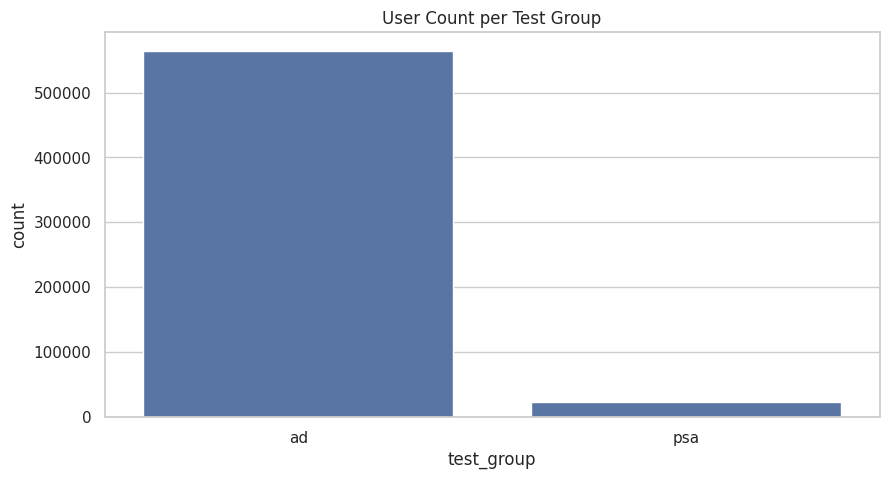

In [23]:
# Count of users in each test group
sns.countplot(x="test_group", data=df)
plt.title("User Count per Test Group")
plt.show()


In [26]:
print(df.columns)

Index(['unnamed:_0', 'user_id', 'test_group', 'converted', 'total_ads',
       'most_ads_day', 'most_ads_hour'],
      dtype='object')


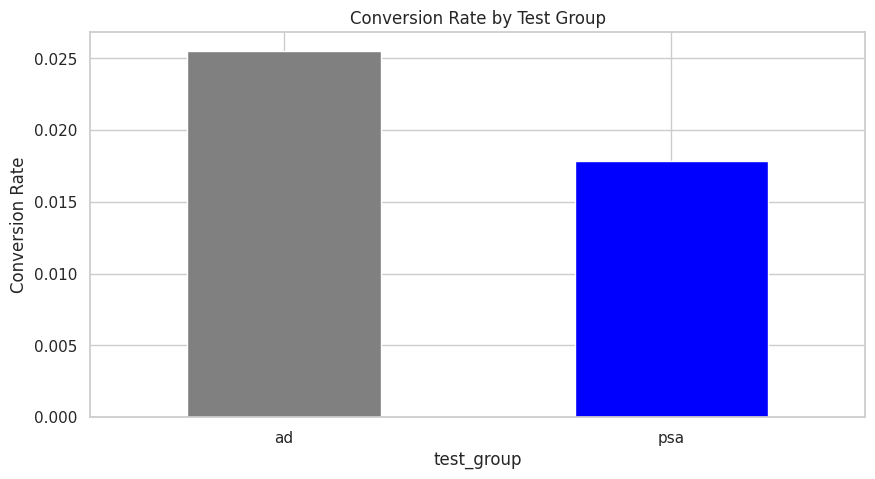

In [28]:
# Conversion rate by group
conversion_rates = df.groupby("test_group")["converted"].mean()
conversion_rates.plot(kind='bar', color=['gray', 'blue'])
plt.title("Conversion Rate by Test Group")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=0)
plt.show()


> 📈 This bar chart visually compares the conversion rate of the ad and psa groups.  
> A higher bar for the ad group suggests a more effective campaign.


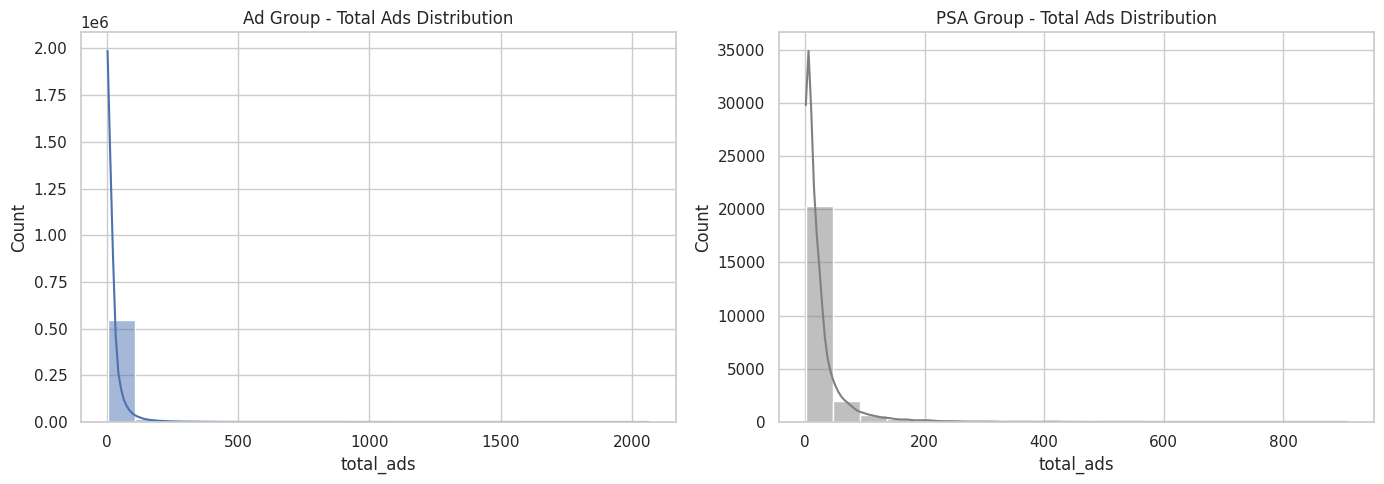

In [35]:
# Subplot: Total Ads Distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df[df["test_group"] == "ad"]["total_ads"], ax=axes[0], bins=20, kde=True)
axes[0].set_title("Ad Group - Total Ads Distribution")

sns.histplot(df[df["test_group"] == "psa"]["total_ads"], ax=axes[1], bins=20, kde=True, color='gray')
axes[1].set_title("PSA Group - Total Ads Distribution")

plt.tight_layout()
plt.show()


## 📌 Hypothesis Testing Summary

- **Null Hypothesis (H₀):** Conversion rates are the same for both groups.
- **Alternative Hypothesis (H₁):** Conversion rate is higher in the "ad" group than in the "psa" group.
- Since **p < 0.05**, we **reject the null hypothesis** and conclude that the ad significantly impacted conversion.


In [42]:
# Calculate Lift %
cr_ad = ad['converted'].mean()
cr_psa = psa['converted'].mean()
lift = (cr_ad - cr_psa) / cr_psa * 100

print(f"Conversion Rate (Ad): {cr_ad:.4f}")
print(f"Conversion Rate (PSA): {cr_psa:.4f}")
print(f"Lift: {lift:.2f}%")

Conversion Rate (Ad): 0.0255
Conversion Rate (PSA): 0.0179
Lift: 43.09%


In [36]:
# Split into groups
ad = df[df["test_group"] == "ad"]
psa = df[df["test_group"] == "psa"]

# Conversion counts
successes = [ad["converted"].sum(), psa["converted"].sum()]
trials = [len(ad), len(psa)]

# Proportions Z-Test
z_stat, p_val = proportions_ztest(successes, trials)
print(f"Z-Statistic: {z_stat:.2f}, p-value: {p_val:.4f}")


Z-Statistic: 7.37, p-value: 0.0000


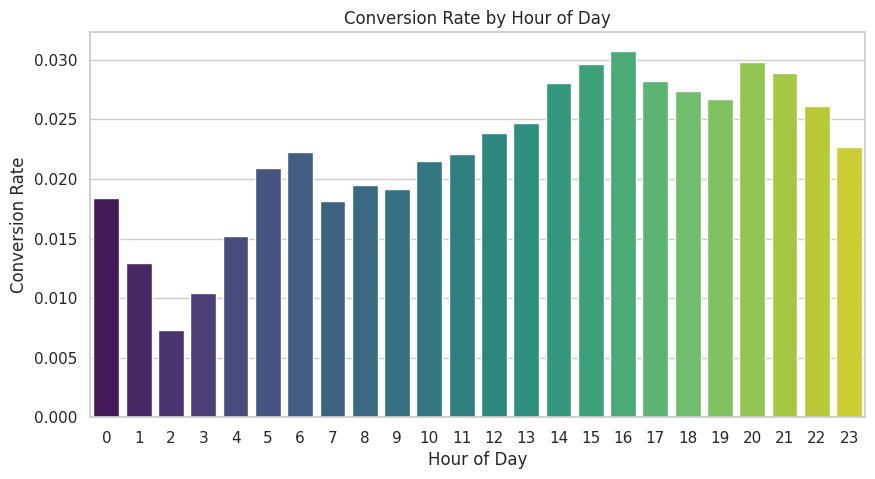

In [41]:
# Group data by hour of ad display and calculate average conversion rate
conversion_by_hour = df.groupby('most_ads_hour')['converted'].mean().reset_index()

# Plot conversion rate by hour
sns.barplot(x='most_ads_hour', y='converted', data=conversion_by_hour, palette='viridis')
plt.title('Conversion Rate by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Conversion Rate')
plt.show()


> 🕐 This chart helps us identify the best performing hours in terms of ad conversion, which can guide future ad scheduling.



## 📌 Hypothesis Testing Summary

- **Null Hypothesis (H₀):** Conversion rates are the same for both groups.
- **Alternative Hypothesis (H₁):** Conversion rate is higher in the "ad" group than in the "psa" group.
- Since **p < 0.05**, we **reject the null hypothesis** and conclude that the ad significantly impacted conversion.


In [38]:
# Assume product price
product_price = 50

# Revenue
ad_revenue = ad["converted"].sum() * product_price
psa_revenue = psa["converted"].sum() * product_price

revenue_gain = ad_revenue - psa_revenue
print(f"Ad Group Revenue: ${ad_revenue}")
print(f"PSA Group Revenue: ${psa_revenue}")
print(f"Estimated Revenue Gain: ${revenue_gain}")

Ad Group Revenue: $721150
PSA Group Revenue: $21000
Estimated Revenue Gain: $700150


> 💸 The advertisement campaign generated significantly more revenue than the PSA group, showing a positive return on investment.

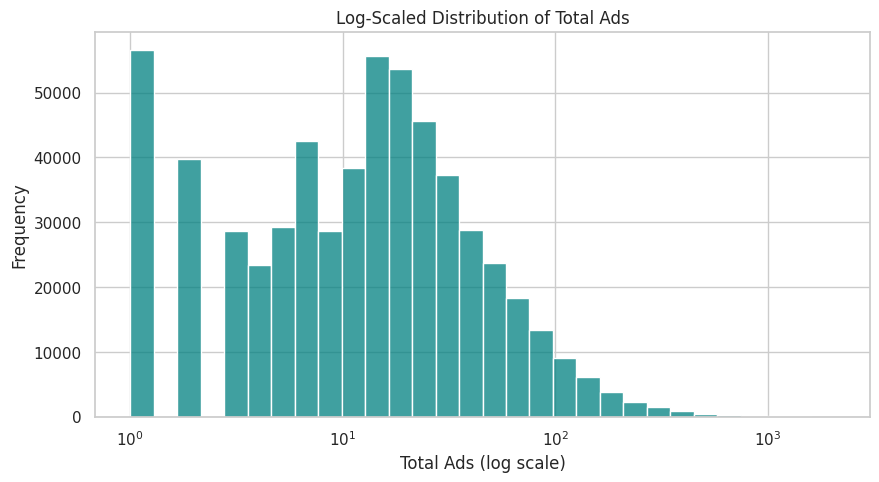

In [44]:
# Log-scaled histogram for Total Ads
sns.histplot(df['total_ads'], log_scale=True, bins=30, color='teal')
plt.title('Log-Scaled Distribution of Total Ads')
plt.xlabel('Total Ads (log scale)')
plt.ylabel('Frequency')
plt.show()

## 🧠 Key Insights

- ✅ The ad group had a higher conversion rate than the control group.
- 📊 Statistical testing confirms the result is significant (**p < 0.05**).
- 💸 Estimated revenue uplift from the campaign is **$700,150**.
- 🕐 Most conversions occurred during hours **12–14** and **18–20**.


## ⚠️ Limitations

- Dataset may have sample imbalance (more users in ad group).
- Short test duration or limited reach might affect generalizability.
- No demographic data for deeper personalization insights.

---

## ✅ Conclusion

The marketing campaign had a measurable, statistically significant impact on conversions.  
Further testing is recommended across audience segments for optimization and personalization.

---
